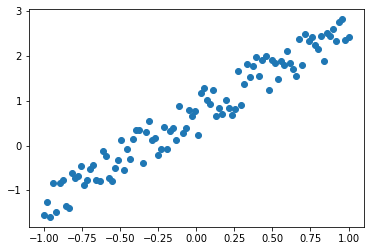

In [1]:
import torch 
from matplotlib import pyplot as plt
from torch.autograd import Variable
from torch import nn
# 创建数据集  unsqueeze 相当于
x = Variable(torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1))
y = Variable(x * 2 + 0.2 + torch.rand(x.size()))
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [4]:
import torch
from torch import nn

class LinearRegression(nn.Module):
    def __init__(self):
        #继承父类构造函数
        super(LinearRegression, self).__init__() 
        #输入和输出的维度都是1
        self.linear = nn.Linear(1, 1) 
    def forward(self, x):
        out = self.linear(x)
        return out

[1/1000] loss:2.3467
[201/1000] loss:0.1487
[401/1000] loss:0.0847
[601/1000] loss:0.0805
[801/1000] loss:0.0802


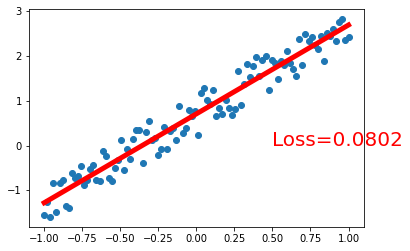

In [5]:
model = LinearRegression()#实例化对象
num_epochs = 1000#迭代次数
learning_rate = 1e-2#学习率0.01
Loss = torch.nn.MSELoss()#损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)#优化函数
for epoch in range(num_epochs):
    # 预测
    y_pred= model(x)
    # 计算loss
    loss = Loss(y_pred, y)
    #清空上一步参数值
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #更新参数
    optimizer.step()
    if epoch % 200 == 0:
        print("[{}/{}] loss:{:.4f}".format(epoch+1, num_epochs, loss))

plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-',lw=5)
plt.text(0.5, 0,'Loss=%.4f' % loss.data.item(), fontdict={'size': 20, 'color':  'red'})
plt.show()